In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
data = pd.read_csv(r"C:\Users\user\OneDrive\Desktop\archive\spam.csv")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [56]:
data.shape

(5572, 5)

In [57]:
data.tail(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5562,ham,Ok lor... Sony ericsson salesman... I ask shuh...,NaN,NaN,NaN
5563,ham,Ard 6 like dat lor.,NaN,NaN,NaN
5564,ham,Why don't you wait 'til at least wednesday to ...,NaN,NaN,NaN
5565,ham,Huh y lei...,NaN,NaN,NaN
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,NaN,NaN,NaN
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


# 1. Data Cleaning

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [59]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [60]:
data.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [61]:
data.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [62]:
data

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [63]:
data.isnull().sum()

target     0
message    0
dtype: int64

In [64]:
data.duplicated().sum()

403

In [65]:
data=data.drop_duplicates(keep='first')

In [66]:
data.duplicated().sum()

0

In [67]:
data.shape

(5169, 2)

In [68]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [69]:
data['target']=encoder.fit_transform(data['target'])

<ipython-input-69-98331fe854a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target']=encoder.fit_transform(data['target'])


In [70]:
data.isnull().sum()

target     0
message    0
dtype: int64

In [71]:
data.duplicated().sum()

0

# Data Analysis

In [72]:
#check total spam(1)
data['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

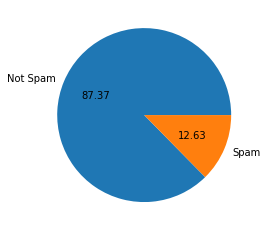

In [73]:
plt.pie(data['target'].value_counts(),labels=['Not Spam','Spam'],autopct="%0.2f")
plt.show

### Data is imbalanced

In [44]:
import nltk

In [45]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [74]:
text=data['message']

In [75]:
text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will �_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5169, dtype: object

In [76]:
no_characters=text.apply(len)

In [77]:
no_characters

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: message, Length: 5169, dtype: int64

In [78]:
data['no_characters']=no_characters

<ipython-input-78-e052e956b00f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_characters']=no_characters


In [79]:
data

,target,message,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [81]:
data['message'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: message, Length: 5169, dtype: int64

In [82]:
data['no_word']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))

<ipython-input-82-758dc722cdc2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_word']=data['message'].apply(lambda x:len(nltk.word_tokenize(x)))


In [83]:
data

,target,message,no_characters,no_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [85]:
data['no_sentence']=data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

<ipython-input-85-47598c707032>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['no_sentence']=data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [86]:
data

,target,message,no_characters,no_word,no_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


#### spam


In [87]:
data[['no_characters','no_word','no_sentence']].describe()

,no_characters,no_word,no_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [88]:
data[data['target']==1][['no_characters','no_word','no_sentence']].describe()

,no_characters,no_word,no_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


#### not spam

In [32]:
data[data['target']==0][['no_characters','no_word','no_sentence']].describe()

,no_characters,no_word,no_sentence
count,4327.000000,4327.000000,4327.000000
mean,1634.200139,347.283799,19.838225
std,1965.016383,407.227757,38.124564
min,13.000000,3.000000,1.000000
25%,577.500000,120.000000,7.000000
50%,1122.000000,240.000000,13.000000
75%,2037.500000,440.500000,22.000000
max,43952.000000,8479.000000,1565.000000


#### outliers hai

<AxesSubplot:>

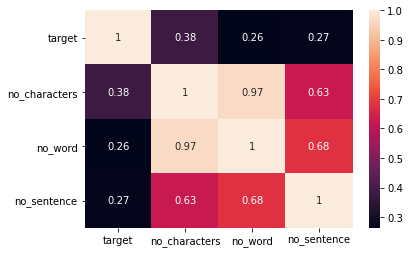

In [90]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True)

### no_char is best case to differentiate still fuddu hai

# Data Preprocessing

In [91]:
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [92]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [137]:
def translate(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(p.stem(i))
        
    
        
    
    return " ".join(y)
#to make a string while returning

In [136]:
from nltk.stem.porter import PorterStemmer
p=PorterStemmer()
p.stem('naming')


'name'

In [133]:
translate('hey!!,My Name is Arnav...How are you doing????')

'hey name arnav'

In [134]:
translate(data['message'][10])

'gon na home soon want talk stuff anymor tonight k cri enough today'

In [138]:
data['translated_words']=data['message'].apply(translate)

<ipython-input-138-b2bf5a13ba82>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['translated_words']=data['message'].apply(translate)


In [139]:
data.head(5)

,target,message,no_characters,no_word,no_sentence,translated_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [141]:
data = data.sample(frac = 1)

In [142]:
 data[data['target']==1]['translated_words'].tolist()

['wow boy r back take 2007 uk tour win vip ticket vip club txt club trackmarqu ltd info vipclub4u',
 'ur award citi break could win summer shop spree everi wk txt store 88039 skilgm tscs087147403231winawk age16',
 'hi custom loyalti offer new nokia6650 mobil txtauction txt word start 81151 get 4t ctxt tc',
 'free 1st week entri 2 textpod 4 chanc 2 win 40gb ipod cash everi wk txt pod 84128 ts cs custcar 08712405020',
 'xma iscom ur award either cd gift voucher free entri 2 r weekli draw txt music 87066 tnc',
 'free msg bill mobil number mistak shortcod call 08081263000 charg call free bt landlin',
 'tri contact repli offer video phone 750 anytim network min half price line rental camcord repli call 08000930705',
 'simpson movi releas juli 2007 name band die start film day day day send b c',
 'dear voucher holder 2 claim 1st class airport loung pass use holiday voucher call book quot 1st class x 2',
 'receiv week tripl echo rington shortli enjoy',
 'chosen receiv award pl call claim numb

In [143]:
spam=[]
for message in  data[data['target']==1]['translated_words'].tolist():
    for words in message.split():
        spam.append(words)

In [144]:
from collections import Counter
Counter(spam).most_common(40)


[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('ur', 119),
 ('u', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('min', 45),
 ('c', 45),
 ('collect', 45),
 ('custom', 42),
 ('guarante', 42),
 ('messag', 42),
 ('per', 41),
 ('chat', 38),
 ('tri', 37),
 ('cs', 35),
 ('draw', 35),
 ('msg', 35),
 ('number', 35)]

# MODEL BUILDING

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_features=2800)

In [181]:

X=tfidf.fit_transform(data['translated_words']).toarray()

In [148]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [149]:
y=data['target'].values

In [150]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [151]:
from sklearn.model_selection import train_test_split


In [152]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [153]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [154]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [155]:
gnb.fit(X_train,y_train)
y_pred01=gnb.predict(X_test)
accuracy_score(y_test,y_pred01)

0.8607350096711799

In [156]:
precision_score(y_test,y_pred01)

0.4497816593886463

In [157]:
mnb.fit(X_train,y_train)
y_pred02=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred02))
precision_score(y_test,y_pred02)

0.9777562862669246


0.99

In [158]:
bnb.fit(X_train,y_train)
y_pred03=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred03))
precision_score(y_test,y_pred03)

0.9835589941972921


0.9905660377358491

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier


In [160]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)

gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [161]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'GBDT':gbdt,

}

In [162]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [163]:

accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9835589941972921
Precision -  1.0
For  KN
Accuracy -  0.9197292069632496
Precision -  1.0
For  NB
Accuracy -  0.9777562862669246
Precision -  0.99
For  DT
Accuracy -  0.9342359767891683
Precision -  0.8117647058823529
For  LR
Accuracy -  0.9642166344294004
Precision -  0.9772727272727273
For  RF
Accuracy -  0.9777562862669246
Precision -  0.99
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.8764044943820225


In [164]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)

from sklearn.ensemble import VotingClassifier

In [165]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('dt', dtc)],voting='soft')

In [166]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('dt', DecisionTreeClassifier(max_depth=5))],
                 voting='soft')

In [167]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 1.0


In [168]:
estimators=[('svm', svc), ('nb', mnb), ('dt', dtc)]
final_estimator=RandomForestClassifier()

In [169]:
from sklearn.ensemble import StackingClassifier

In [170]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9864603481624759
Precision 0.9819819819819819


In [194]:
abs=input("enter a message")

enter a messageThe clock is ticking! Grab a 30% discount at Wow! Momo before it's gone! Only 2 days left! Use code WMRP06143TBP0W4 at the nearest store. T&C apply.


In [195]:
abs=translate(abs)
abs

'clock tick grab 30 discount wow momo gone 2 day left use code wmrp06143tbp0w4 nearest store c appli'

In [196]:
X=tfidf.transform([abs])

In [197]:
X

<1x2800 sparse matrix of type '<class 'numpy.float64'>'
	with 12 stored elements in Compressed Sparse Row format>

In [198]:
ans=bnb.predict(X)

In [199]:
type(ans)

numpy.ndarray

In [201]:
if(ans[0])==0:
    print("not a spam")
else:
    print("spam")

spam
